In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDims/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

          bw          mse
0   0.000282  3195.849455
1   0.000372  3195.849453
2   0.000491  3195.849113
3   0.000649  3195.842229
4   0.000857  3195.802951
5   0.001131  3195.654713
6   0.001493  3195.473911
7   0.001972  3195.120249
8   0.002603  3194.574782
9   0.003437  3193.779992
10  0.004538  3192.349291
11  0.005992  3189.955015
12  0.007912  3185.892137
13  0.010446  3178.673709
14  0.013793  3165.407745
15  0.018211  3141.713128
16  0.024046  3101.351474
17  0.031749  3033.696997
18  0.041919  2924.484261
19  0.055348  2750.844870
20  0.073079  2474.934601
21  0.096490  2053.224483
22  0.127401  1474.932392
23  0.168214   838.966223
24  0.222102   348.930798
25  0.293252   108.388879
26  0.387196    28.335534
27  0.511235     8.860857
28  0.675010     5.175006


Text(0.5, 1.0, 'Minimum MSE is (5.175005961968067, 28)')

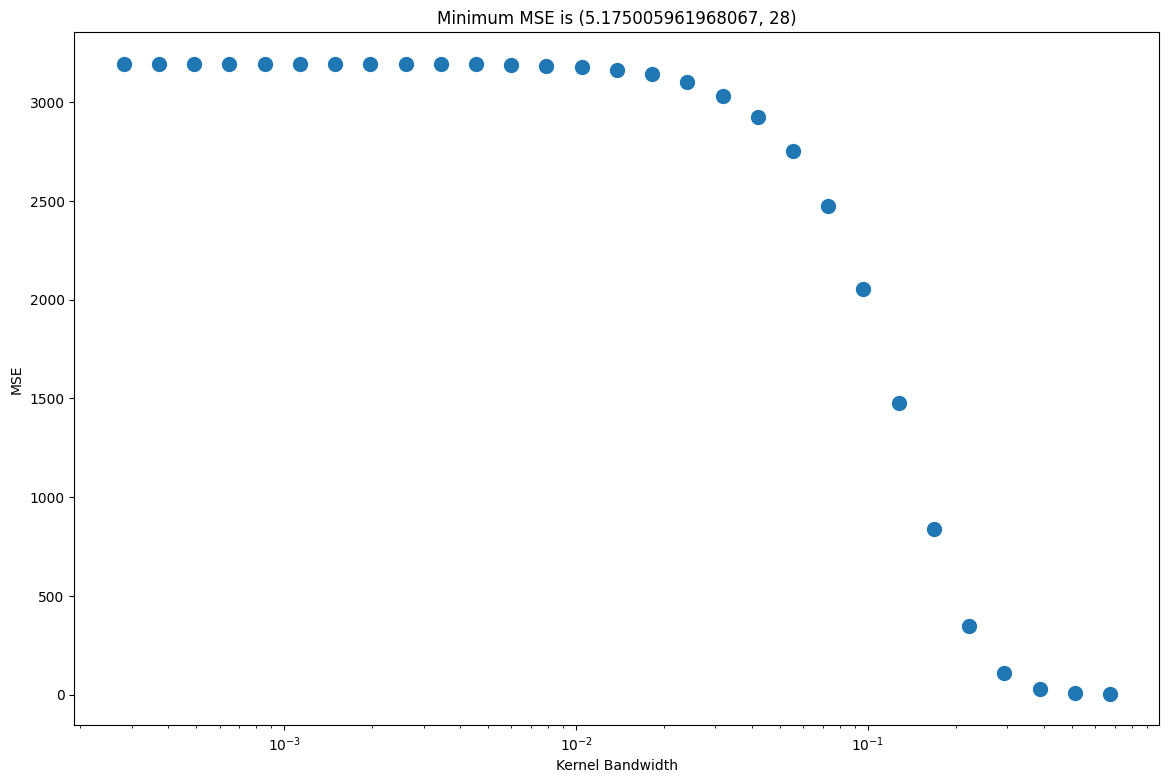

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")

In [5]:
print(mses)

          bw          mse
0   0.000282  3195.849455
1   0.000372  3195.849453
2   0.000491  3195.849113
3   0.000649  3195.842229
4   0.000857  3195.802951
5   0.001131  3195.654713
6   0.001493  3195.473911
7   0.001972  3195.120249
8   0.002603  3194.574782
9   0.003437  3193.779992
10  0.004538  3192.349291
11  0.005992  3189.955015
12  0.007912  3185.892137
13  0.010446  3178.673709
14  0.013793  3165.407745
15  0.018211  3141.713128
16  0.024046  3101.351474
17  0.031749  3033.696997
18  0.041919  2924.484261
19  0.055348  2750.844870
20  0.073079  2474.934601
21  0.096490  2053.224483
22  0.127401  1474.932392
23  0.168214   838.966223
24  0.222102   348.930798
25  0.293252   108.388879
26  0.387196    28.335534
27  0.511235     8.860857
28  0.675010     5.175006
